<a href="https://colab.research.google.com/github/rahmatjagoan/Aplikasi-Login/blob/main/Preprocessing_Data_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

# ***PREPROCESSING DATA***

In [14]:
import pandas as pd

data = pd.read_csv("dataset_tweet.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          2001 non-null   int64 
 1   Text        1884 non-null   object
 2   Positif     36 non-null     object
 3   Netral      437 non-null    object
 4   Negatif     1409 non-null   object
 5   Keterangan  1878 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


In [15]:
data.head(5)

,No,Text,Positif,Netral,Negatif,Keterangan
0,1,Banyak indikator lain yg bisa kita amati secar...,NaN,NaN,✓,Negatif
1,2,TVR 120 - Komisi I DPR RI : Regulasi Pemberian...,NaN,NaN,✓,Negatif
2,3,@RomitsuT Sorak sorai bergembira.... Bansos Ti...,NaN,NaN,✓,Negatif
3,4,Sebagian asyik judi online Yg lain mumet pinj...,NaN,✓,NaN,Netral
4,5,Jadi mikir ngapain gue bayar pajak sebanyak it...,NaN,NaN,✓,Negatif


In [17]:
df  = pd.DataFrame(data[['Text','Keterangan']])
df.head(5)

,Text,Keterangan
0,Banyak indikator lain yg bisa kita amati secar...,Negatif
1,TVR 120 - Komisi I DPR RI : Regulasi Pemberian...,Negatif
2,@RomitsuT Sorak sorai bergembira.... Bansos Ti...,Negatif
3,Sebagian asyik judi online Yg lain mumet pinj...,Netral
4,Jadi mikir ngapain gue bayar pajak sebanyak it...,Negatif


**PROSES HAPUS DATA DUPLIKAT**

---



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1884 non-null   object
 1   Keterangan  1878 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [20]:
df.drop_duplicates(subset ="Text", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 506
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         345 non-null    object 
 1   Username     345 non-null    object 
 2   Rating       345 non-null    float64
 3   Review Text  345 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.5+ KB


In [21]:
df.head(5)

,Text,Keterangan
0,Banyak indikator lain yg bisa kita amati secar...,Negatif
1,TVR 120 - Komisi I DPR RI : Regulasi Pemberian...,Negatif
2,@RomitsuT Sorak sorai bergembira.... Bansos Ti...,Negatif
3,Sebagian asyik judi online Yg lain mumet pinj...,Netral
4,Jadi mikir ngapain gue bayar pajak sebanyak it...,Negatif


**WORDCLOUD SEBELUM PREPROCESSING**

---



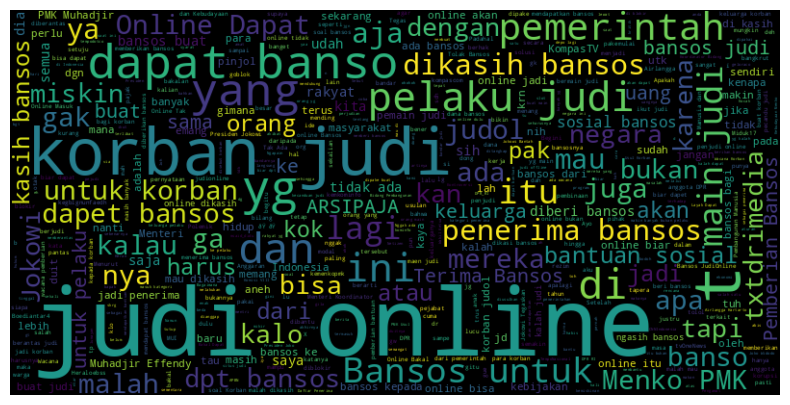

In [23]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Text'] = df['Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

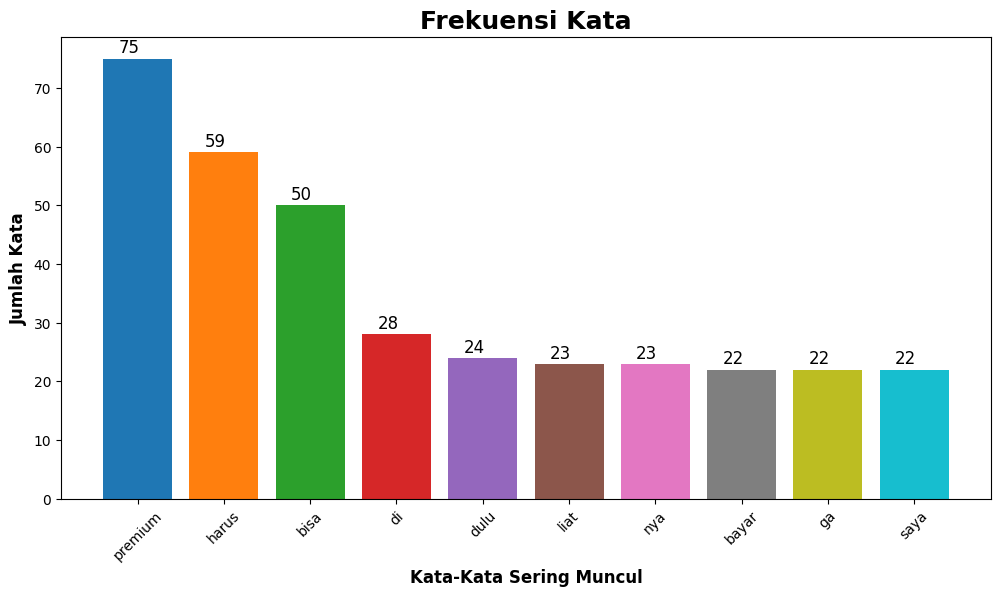

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya
4,NaN,NaN,NaN,,
5,2025-04-07 12:59:37,Pengguna Google,5.0,kak aku berguan banet jadi bisa liat nama aku ...,kak aku berguan banet jadi bisa liat nama aku ...
6,2025-04-07 12:54:10,Pengguna Google,4.0,lumayan buat jaga2.klo ada no baru,lumayan buat jagaklo ada no baru
7,2025-04-07 12:29:32,Pengguna Google,1.0,semua harus premium,semua harus premium
9,2025-04-07 11:22:49,Pengguna Google,4.0,lihat tag harus berlangganan syang skali,lihat tag harus berlangganan syang skali
10,2025-01-02 06:50:27,Pengguna Google,1.0,Getcontact dongo gua ada uang 20k lagi juga di...,Getcontact dongo gua ada uang k lagi juga di a...


**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya
4,NaN,NaN,NaN,,,


**Normalisasi Kata**

---



In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data =  pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya
4,NaN,NaN,NaN,,,


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df =  pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case_folding','normalisasi']])

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu,sangat membantu
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...,ini aplikasi gunanya apa kalau tidak bisa di l...
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt,bagus banget
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi ya
4,NaN,NaN,NaN,,,,


**TOKENIZATION**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]"
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...,ini aplikasi gunanya apa kalau tidak bisa di l...,"[ini, aplikasi, gunanya, apa, kalau, tidak, bi..."
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt,bagus banget,"[bagus, banget]"
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi ya,"[bagus, banget, aplikasi, ya]"
4,NaN,NaN,NaN,,,,,[]


**PROSES STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu]
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...,ini aplikasi gunanya apa kalau tidak bisa di l...,"[ini, aplikasi, gunanya, apa, kalau, tidak, bi...","[aplikasi, gunanya, lihat, premium]"
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt,bagus banget,"[bagus, banget]","[bagus, banget]"
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi ya,"[bagus, banget, aplikasi, ya]","[bagus, banget, aplikasi, ya]"
4,NaN,NaN,NaN,,,,,[],[]


**PROSES STEAMING DATA**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-07 14:12:43,Pengguna Google,5.0,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],bantu
1,2025-04-07 14:07:09,Pengguna Google,1.0,Ini apk gunanya apa KLO gk bisa di liat harus ...,Ini apk gunanya apa KLO gk bisa di liat harus ...,ini apk gunanya apa klo gk bisa di liat harus ...,ini aplikasi gunanya apa kalau tidak bisa di l...,"[ini, aplikasi, gunanya, apa, kalau, tidak, bi...","[aplikasi, gunanya, lihat, premium]",aplikasi guna lihat premium
2,2025-04-07 13:44:59,Pengguna Google,5.0,bagussss bgtttt,bagussss bgtttt,bagussss bgtttt,bagus banget,"[bagus, banget]","[bagus, banget]",bagus banget
3,2025-04-07 13:27:07,Pengguna Google,5.0,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi nya,bagus banget aplikasi ya,"[bagus, banget, aplikasi, ya]","[bagus, banget, aplikasi, ya]",bagus banget aplikasi ya
4,NaN,NaN,NaN,,,,,[],[],


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 506
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              345 non-null    object 
 1   Username          345 non-null    object 
 2   Rating            345 non-null    float64
 3   Review Text       346 non-null    object 
 4   cleaning          346 non-null    object 
 5   case_folding      346 non-null    object 
 6   normalisasi       346 non-null    object 
 7   tokenize          346 non-null    object 
 8   stopword removal  346 non-null    object 
 9   steming_data      346 non-null    object 
dtypes: float64(1), object(9)
memory usage: 37.8+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



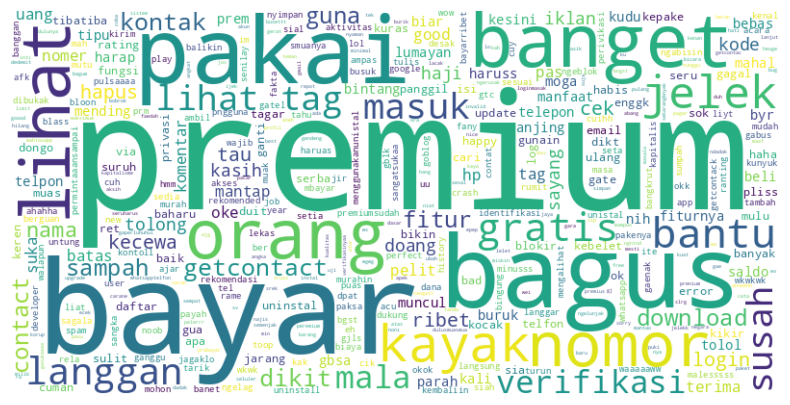

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','aplikasi'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

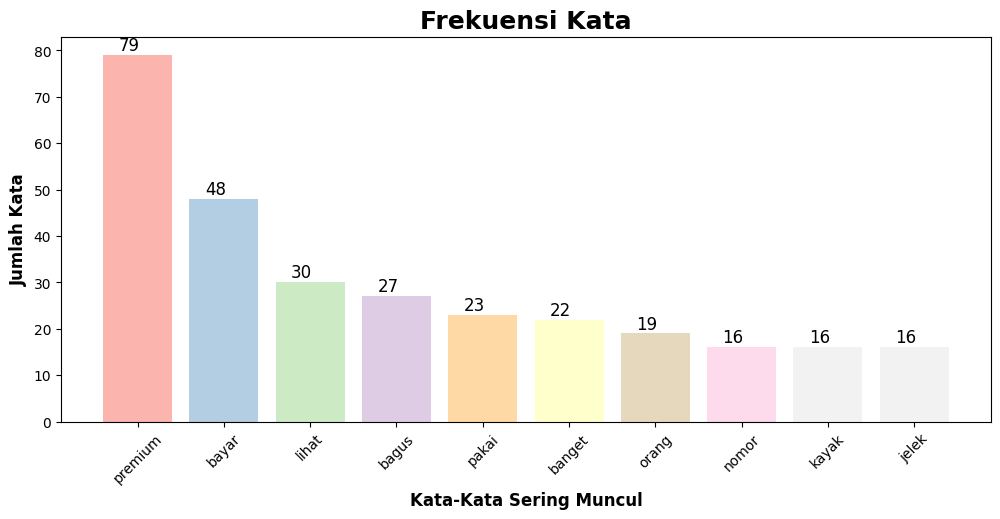

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["steming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','aplikasi'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()


In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);